<a href="https://colab.research.google.com/github/pdrzxzz/moon-phases/blob/main/Fases_Da_Lua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skyfield
!pip install ephem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 18.5 MB/s eta 0:00:00


In [ ]:
import ephem
import matplotlib.pyplot as plt
from datetime import date, datetime

In [ ]:
now = ephem.Date(datetime.utcnow())
print(now)

2025/4/4 14:22:49


In [ ]:
moon = ephem.Moon()

In [ ]:
# Percent of moon surface illuminated
moon.compute(now)
moon.moon_phase

0.44653237341033136

In [ ]:
# Track moon data from January 2025
illumination_percentages = []
for i in range (1, 32):
  moon.compute(f'2025/1/{i}')
  illumination_percentages.append(moon.moon_phase)
illumination_percentages[:5], illumination_percentages[-5:]

([0.014812650902289004,
  0.050717573884731304,
  0.10893125748244126,
  0.1873222952845382,
  0.2823740171750012],
 [0.07641539863762292,
  0.030013671700643063,
  0.004819376753494697,
  0.0038559785170105276,
  0.028700720763770615])

In [ ]:
# Retrieve the day of the next first quarter moon
first_quarter_moon = ephem.next_first_quarter_moon('2025')
first_quarter_moon_day = int(first_quarter_moon.triple()[2])

# Retrieve the day of the next full moon
full_moon = ephem.next_full_moon('2025')
full_moon_day = int(full_moon.triple()[2])

# Retrieve the day of the next full moon
last_quarter_moon = ephem.next_last_quarter_moon('2025')
last_quarter_moon_day = int(last_quarter_moon.triple()[2])

# Retrieve the day of the next full moon
new_moon = ephem.next_new_moon('2025')
new_moon_day = int(new_moon.triple()[2])

first_quarter_moon_day, full_moon_day, last_quarter_moon_day, new_moon_day

(6, 13, 21, 29)

In [ ]:
colors = []
for day in range(1, 32):
  if(day <= first_quarter_moon_day):
    colors.append('blue')
    continue
  if(day <= full_moon_day):
    colors.append('green')
    continue
  if(day <= last_quarter_moon_day):
    colors.append('yellow')
    continue
  colors.append('purple')
len(colors)

31

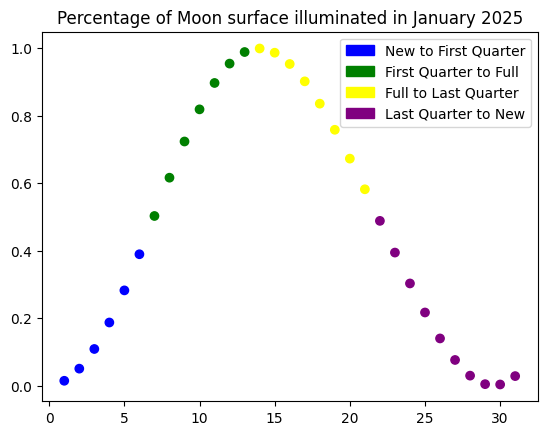

In [ ]:
import matplotlib.patches as mpatches

plt.scatter(range(1, 32), illumination_percentages, c=colors)
plt.title("Percentage of Moon surface illuminated in January 2025")
# for day in [first_quarter_moon_day, full_moon_day, last_quarter_moon_day]:
#   moon.compute(day)
#   plt.vlines(day, 0, illumination_percentages[day-1], color='black')
# plt.vlines(new_moon_day, illumination_percentages[new_moon_day-1], 1, color='black')
legends = [mpatches.Patch(color='blue', label='New to First Quarter'),
           mpatches.Patch(color='green', label='First Quarter to Full'),
           mpatches.Patch(color='yellow', label='Full to Last Quarter'),
           mpatches.Patch(color='purple', label='Last Quarter to New')]
plt.legend(handles=legends)
plt.show()

## Amplyfing for all year

In [ ]:
# Track moon data from ALL 2025
illumination_percentages = []
for month in range(1, 13):
  days_in_month = 31 if month in [1, 3, 5, 7, 8, 10, 12] else 30
  if month == 2: days_in_month = 28
  for day in range (1, days_in_month+1):
    moon.compute(f'2025/{month}/{day}')
    illumination_percentages.append(moon.moon_phase)
len(illumination_percentages)

365

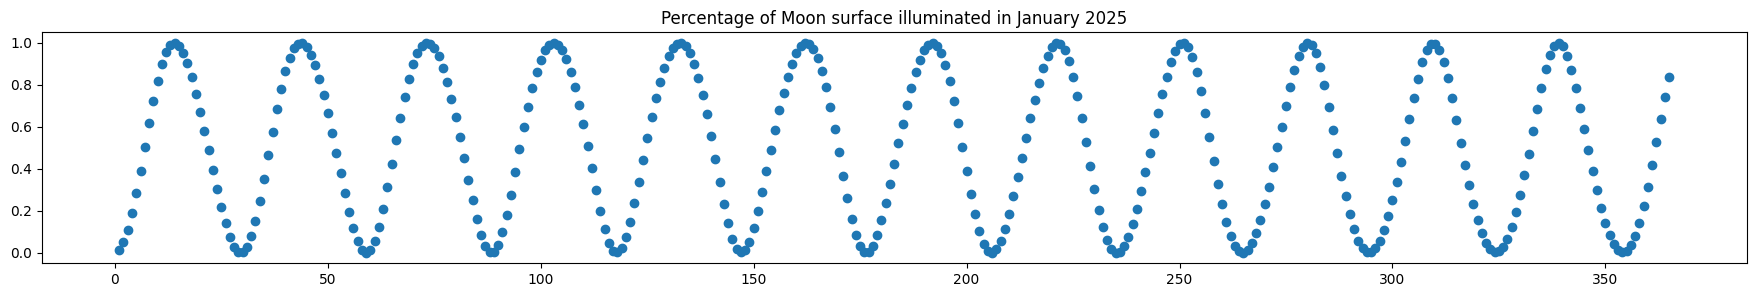

In [ ]:
plt.figure(figsize=(22,3))
plt.scatter(range(1, 366), illumination_percentages)
plt.title("Percentage of Moon surface illuminated in January 2025")
plt.show()

In [ ]:
# Retrieve the day of the next first quarter moon

for month in range(1, 13):
  first_quarter_moon = ephem.next_first_quarter_moon('2025')
  first_quarter_moon_day = int(first_quarter_moon.triple()[2])
  print(first_quarter_moon_day)

